In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

usu_individual = '/Users/tomasrodriguezmamberti/Downloads/EPH_usu_4to_Trim_2023_xlsx/usu_individual_T423.xlsx'
df = pd.read_excel(usu_individual)


In [ ]:
#PARTE 1:

In [14]:
#2)
#a)
df_filtrado = df[df['REGION'] == 1]
print(df_filtrado.head())



                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
110  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           2   
111  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           1   
112  TQRMNOPUUHJKLQCDEIIAD00793187  2023          4          1           2   
113  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR  \
109    1       1       S          32     1775  ...      NaN        5   
110    1       1       S          32     1775  ...      NaN        5   
111    2       1       S          32      609  ...      NaN       12   
112    1       1       S          32      609  ...      NaN       12   
113    1       1       S          32     3129  ...      NaN        8   

          IPCF  DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH  
109  225000.00      

In [9]:
# b) 
# Ingresos 
df_filtrado = df_filtrado[df_filtrado['IPCF'] >= 0]
df_filtrado = df_filtrado[df_filtrado['ITF'] >= 0]

# Edad 
df_filtrado = df_filtrado[df_filtrado['CH06'] >= 0]

# Horas trabajadas 
df_filtrado = df_filtrado[(df_filtrado['PP3E_TOT'] >= 0) & (df_filtrado['PP3E_TOT'] <= 168)]
df_filtrado = df_filtrado[(df_filtrado['PP3F_TOT'] >= 0) & (df_filtrado['PP3F_TOT'] <= 168)]


print(df_filtrado.head())

                            CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  COMPONENTE  \
109  TQRMNOTUUHJMLPCDEIIAD00801670  2023          4          1           1   
113  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           1   
114  TQRMNOPUTHKLMNCDEIIAD00791268  2023          4          1           2   
116  TQRMNORXPHKLMNCDEIIAD00791273  2023          4          2           1   
126  TQRMNOQWYHLMKRCDEIJAH00854987  2023          4          1           1   

     H15  REGION MAS_500  AGLOMERADO  PONDERA  ...  PDECIFR  ADECIFR  \
109    1       1       S          32     1775  ...      NaN        5   
113    1       1       S          32     3129  ...      NaN        8   
114    1       1       S          32     3129  ...      NaN        8   
116    1       1       S          32     3357  ...      NaN        5   
126    1       1       S          33     1656  ...      NaN        2   

          IPCF  DECCFR  IDECCFR  RDECCFR  GDECCFR  PDECCFR  ADECCFR  PONDIH  
109  225000.00      

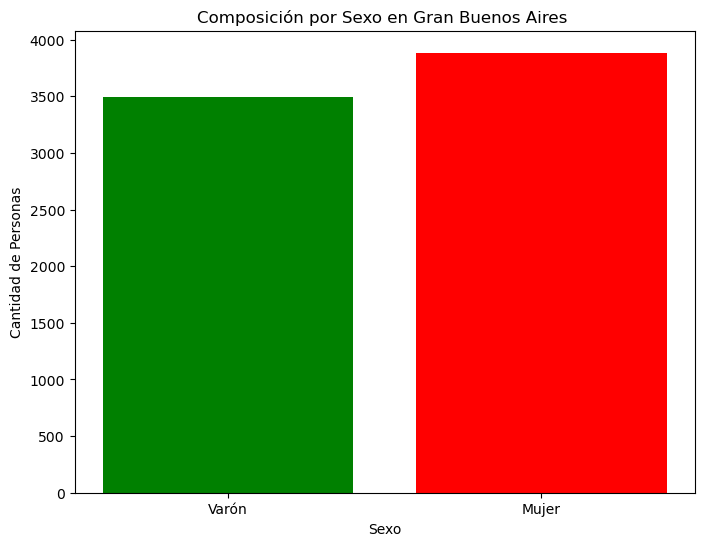

In [15]:
# c) 
sexo_counts = df_filtrado['CH04'].value_counts().sort_index()
sexo_labels = ['Varón', 'Mujer']
#Grafico
plt.figure(figsize=(8, 6))
plt.bar(sexo_labels, sexo_counts, color=['green', 'red'])
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.title('Composición por Sexo en Gran Buenos Aires ')
plt.show()

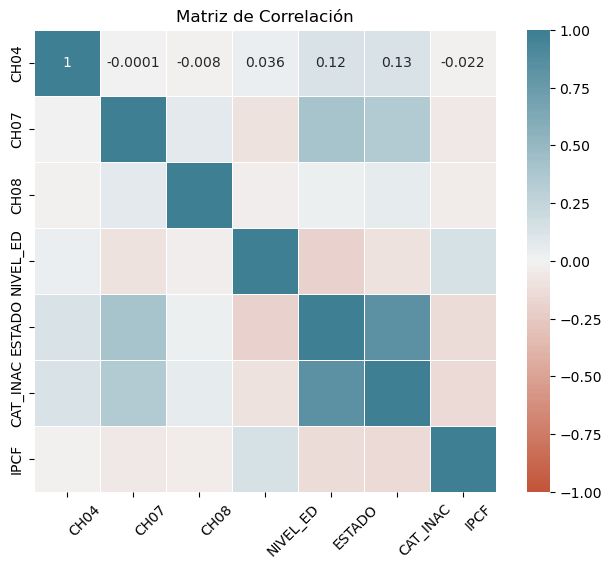

In [18]:
#d)
variables = ['CH04', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']
corr = df_filtrado[variables].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    linewidths=0.5  
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='left'
)
plt.title('Matriz de Correlación')
plt.show()

In [21]:
#e) 
desocupados = df_filtrado[df_filtrado['ESTADO'] == 2]  # Estado 2 indica desocupado
inactivos = df_filtrado[df_filtrado['ESTADO'] == 3]  # Estado 3 indica inactivo

# Calcular la media de IPCF según estado
df_filtrado = df_filtrado[df_filtrado['ESTADO'].isin([1, 2, 3])]
media_ingreso_por_estado = df_filtrado.groupby('ESTADO')['IPCF'].mean()

# Imprimir resultados
print("Número de desocupados:", len(desocupados))
print("Número de inactivos:", len(inactivos))
print("\nMedia de ingreso per cápita familiar (IPCF) según estado:")
print(media_ingreso_por_estado)

Número de desocupados: 240
Número de inactivos: 2765

Media de ingreso per cápita familiar (IPCF) según estado:
ESTADO
1    132041.486499
2     58012.198417
3     84993.676882
Name: IPCF, dtype: float64


In [28]:
#f)
tabla_adulto_equiv = '/Users/tomasrodriguezmamberti/Downloads/Big data - TP3/tabla_adulto_equiv.xlsx'
df_adulto_equiv = pd.read_excel(tabla_adulto_equiv)

def calcular_adulto_equiv(row):
    edad = row['CH06']
    sexo = row['CH04']
    if sexo == 1:  # Varón
        return df_adulto_equiv[df_adulto_equiv['Edad'] == edad]['Varones'].values[0]
    elif sexo == 2:  # Mujer
        return df_adulto_equiv[df_adulto_equiv['Edad'] == edad]['Mujeres'].values[0]
df_filtrado['adulto_equiv'] = df_filtrado.apply(calcular_adulto_equiv, axis=1 
df_filtrado['ad_equiv_hogar'] = df_filtrado.groupby('NRO_HOGAR')['adulto_equiv'].transform('sum')

df_filtrado.to_excel('/Users/tomasrodriguezmamberti/Downloads/Big data - base_datos_con_ad_equiv.xlsx', index=False)

KeyError: 'Edad'

In [ ]:
#3) 

# Especifica la ruta completa al archivo si no está en el mismo directorio
file_path = 'C:\\Users\\Santiago\\Desktop\\2024\\1er cuatri\\Big Data\\Big-Data-TP3\\EPH_usu_4to_Trim_2023_xlsx\\usu_hogar_T423.xlsx'

# =
df = pd.read_excel(file_path)


itf_column = 'ITF'

respondieron = df[df[itf_column] != 0]

no_respondieron = df[df[itf_column] == 0]

respondieron.to_excel('respondieron.xlsx', index=False)
no_respondieron.to_excel('norespondieron.xlsx', index=False)

personas_no_respondieron = no_respondieron.shape[0]

print(f'Cantidad de personas que no respondieron cuál es su ingreso total familiar (ITF): {personas_no_respondieron}')

In [ ]:
#4)
file_path = 'respondieron.xlsx'
df = pd.read_excel(file_path)

canasta_basica_total = 132853.3


df['ingreso_necesario'] = canasta_basica_total * ad_equiv_por_hogar

output_file = 'respondieron_con_ingreso_necesario.xlsx'
df.to_excel(output_file, index=False)

print(f'Se ha guardado el archivo "{output_file}" con la columna "ingreso_necesario" agregada.')

In [ ]:
#5)
file_path = 'respondieron_con_ingreso_necesario.xlsx'
df = pd.read_excel(file_path)

if 'ITF' in df.columns and 'ingreso_necesario' in df.columns:
    # Agregar la columna 'pobre'
    df['pobre'] = (df['ITF'] < df['ingreso_necesario']).astype(int)
    
    # Contar cuántos son identificados como pobres
    pobres_identificados = df['pobre'].sum()
    
    # Guardar el DataFrame actualizado en el mismo archivo Excel
    df.to_excel(file_path, index=False)
    
    # Mostrar un mensaje con la cantidad de pobres identificados
    print(f'Se ha actualizado el archivo "{file_path}" agregando la columna "pobre".')
    print(f'Se identificaron {pobres_identificados} pobres.')
else:
    print("No se encontraron las columnas 'ITF' e 'ingreso_necesario' en el DataFrame.")

In [ ]:
#PARTE 2:

In [ ]:
#1)
def eliminar_columnas_ingresos(df):
    # Lista de columnas a eliminar
    columnas_a_eliminar = [
        'ingreso_ocio', 'ingreso_tot', 'ing_otros', 'ing_tot_i', 
        'ing_no_lab', 'ing_tot_fam', 'ing_per_cap', 
        'ad_equiv_hogar', 'adulto_equiv', 'ingreso_necesario'
    ]
    
    df = df.drop(columns=columnas_a_eliminar, errors='ignore')
    
    return df

archivo_respondieron = 'respondieron.xlsx'
archivo_norespondieron = 'norespondieron.xlsx'

df_respondieron = pd.read_excel(archivo_respondieron)
df_respondieron = eliminar_columnas_ingresos(df_respondieron)

df_norespondieron = pd.read_excel(archivo_norespondieron)
df_norespondieron = eliminar_columnas_ingresos(df_norespondieron)

df_respondieron.to_excel('respondieron_sin_ingresos.xlsx', index=False)
df_norespondieron.to_excel('norespondieron_sin_ingresos.xlsx', index=False)

print('Se han eliminado las columnas relacionadas con ingresos y se han guardado los archivos actualizados.')

In [29]:
#2)
from sklearn.model_selection import train_test_split
file_path = 'respondieron_sin_ingresos.xlsx'
df = pd.read_excel(file_path)
df['intercepto'] = 1

X = df.drop(columns=['pobre'])
y = df['pobre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print(f'Dimensiones de X_train: {X_train.shape}')
print(f'Dimensiones de X_test: {X_test.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')

print('Se han dividido los datos en conjuntos de entrenamiento y prueba correctamente.')

FileNotFoundError: [Errno 2] No such file or directory: 'respondieron_sin_ingresos.xlsx'

In [ ]:
#3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

logit_model = LogisticRegression()
lda_model = LinearDiscriminantAnalysis()
knn_model = KNeighborsClassifier(n_neighbors=3)

logit_model.fit(X_train, y_train)
lda_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

logit_pred = logit_model.predict(X_test)
lda_pred = lda_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

logit_cm = confusion_matrix(y_test, logit_pred)
lda_cm = confusion_matrix(y_test, lda_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

logit_acc = accuracy_score(y_test, logit_pred)
lda_acc = accuracy_score(y_test, lda_pred)
knn_acc = accuracy_score(y_test, knn_pred)

logit_probs = logit_model.predict_proba(X_test)[:, 1]
lda_probs = lda_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]

logit_auc = roc_auc_score(y_test, logit_probs)
lda_auc = roc_auc_score(y_test, lda_probs)
knn_auc = roc_auc_score(y_test, knn_probs)


In [ ]:
#4) 
print("Matriz de Confusión - Logit:")
print(logit_cm)
print("AUC - Logit:", logit_auc)
print("Accuracy - Logit:", logit_acc)

print("\nMatriz de Confusión - LDA:")
print(lda_cm)
print("AUC - LDA:", lda_auc)
print("Accuracy - LDA:", lda_acc)

print("\nMatriz de Confusión - KNN:")
print(knn_cm)
print("AUC - KNN:", knn_auc)
print("Accuracy - KNN:", knn_acc)

In [ ]:
#5)
X_norespondieron = 
X_norespondieron = np.c_[np.ones(X_norespondieron.shape[0]), X_norespondieron]
pobreza_pred = logit_model.predict(X_norespondieron)

prop_pobres_identificadas = sum(pobreza_pred) / len(pobreza_pred)
print("Proporción de personas pobres identificadas:", prop_pobres_identificadas)
